In [2]:
# importo librerías
import pandas as pd
import numpy as np
import os as os
import seaborn as sns
import matplotlib as mpl
import datetime as dt
import calendar # idem
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
!conda env list

# conda environments:
#
base                     /home/cesar/anaconda3
venv                  *  /home/cesar/anaconda3/envs/venv



In [4]:
os.environ['PYTHONPATH']

'/opt/spark-2.2.0-bin-hadoop2.7/python:/opt/spark-2.2.0-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip:home/cesar/anaconda3/bin'

In [5]:
os.getcwd()

'/home/cesar/universidad/7506/tp/2019_1C/tpdatos_v01/tpdatos2019/notebooks'

In [6]:
os.chdir('/home/cesar/universidad/7506/tp/2019_1C/data/')

In [23]:
%time
dfClicks = pd.read_csv('../data/clicks.csv', 
                 engine='c', 
                 usecols=['advertiser_id', 'source_id', 'created',
                          'latitude', 'longitude', 'carrier_id', 
                          'os_minor', 'agent_device', 'os_major', 'specs_brand', 'brand',
                          'timeToClick', 'touchX', 'touchY', 'ref_type', 'ref_hash'], 
                 dtype={'advertiser_id':np.int8, 'source_id':np.int8, 
                        'carrier_id':'category', 
                        'os_minor':'category', 'os_major':'category', 'specs_brand':np.int8, 'brand':'category',
                        'timeToClick':np.float16, 'touchX':np.float16, 'touchY':np.float16, 'ref_type':np.int8, 'ref_hash':np.int8})
dfClicks.head(1)



CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.68 µs


,advertiser_id,source_id,created,latitude,longitude,carrier_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,4,2019-03-06T22:42:12.755Z,1.205689,1.070234,1.0,6.768137412412545e+18,NaN,3.072849339937028e+18,-110,NaN,1.563477,0.904785,0.078003,-9,21


In [8]:
dfClicks.head(10)

,advertiser_id,source_id,created,latitude,longitude,carrier_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,4,2019-03-06T22:42:12.755Z,1.205689,1.070234,1.0,6.768137412412545e+18,NaN,3.072849339937028e+18,-110,NaN,1.563477,0.904785,0.078003,-9,21
1,0,0,2019-03-08T10:24:30.641Z,1.218924,1.071209,4.0,3.025219449024123e+18,NaN,1.77408510258909e+18,31,NaN,NaN,NaN,NaN,-9,58
2,0,0,2019-03-08T15:24:16.069Z,1.205689,1.070234,6.0,5.97565607170903e+18,NaN,3.072849339937028e+18,31,NaN,NaN,0.945801,0.472900,-9,-9
3,2,3,2019-03-06T03:08:51.543Z,1.205689,1.070234,45.0,6.768137412412545e+18,NaN,3.072849339937028e+18,-110,NaN,19.015625,0.035004,0.430908,-9,45
4,2,3,2019-03-06T03:32:55.570Z,1.205689,1.070234,45.0,6.768137412412545e+18,NaN,3.072849339937028e+18,-110,NaN,28.109375,0.053986,0.423096,-9,45
5,5,4,2019-03-07T18:02:25.833Z,1.209638,1.064208,27.0,3.025219449024123e+18,NaN,1.77408510258909e+18,31,1.0,NaN,0.605957,0.458984,-9,-82
6,3,1,2019-03-12T15:17:04.453Z,1.209638,1.064208,27.0,3.3786399484966047e+18,3.032809e+17,4.566453911975694e+18,-110,1.0,NaN,NaN,NaN,-9,79
7,1,2,2019-03-06T19:15:47.249Z,1.205393,1.077238,NaN,NaN,NaN,NaN,-43,NaN,NaN,NaN,NaN,-9,-49
8,3,0,2019-03-07T23:11:01.934Z,1.205058,1.077332,19.0,3.025219449024123e+18,NaN,1.77408510258909e+18,31,NaN,3.128906,0.889160,0.977051,-9,91
9,3,1,2019-03-07T23:06:30.642Z,1.205689,1.070234,18.0,3.3786399484966047e+18,NaN,4.566453911975694e+18,-110,1.0,1.707031,0.466064,0.984863,-9,37


## Analisis inicial

In [26]:
dfClicks['total'] = 1 


In [143]:
dfClicks.shape

(3412, 16)

In [10]:
#attributed = ver los valores que son atribuidos al anunciante
dfClicks['advertiser_id'].unique()

array([2, 0, 5, 3, 1, 8, 7])

In [36]:
dfClicks['advertiser_id'].value_counts().to_frame()

,advertiser_id
3,26263
0,70
2,12
7,2
1,2
8,1
5,1


In [51]:
dfClicks.groupby('advertiser_id')['total'].count().nlargest(3).to_frame()

,total
advertiser_id,
3,26263
0,70
2,12


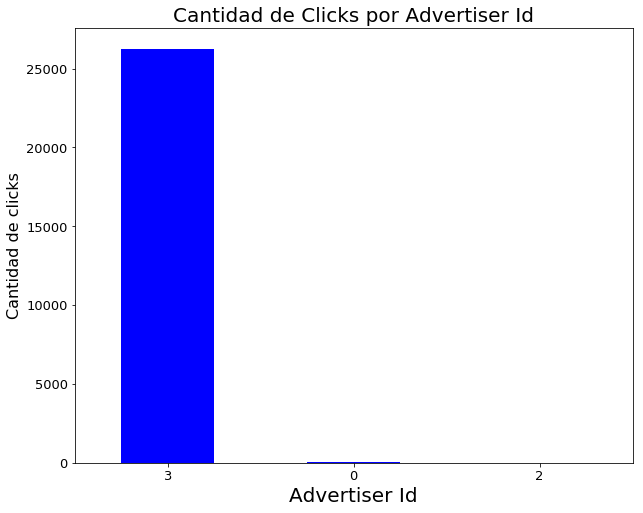

In [38]:
dfClicks.groupby('advertiser_id')['total'].count().nlargest(3).plot(kind='bar', rot=0, figsize=(10,8) ,fontsize=13, color="Blue" );
plt.title('Cantidad de Clicks por Advertiser Id', fontsize=20);
plt.ylabel('Cantidad de clicks', fontsize=16);
plt.xlabel('Advertiser Id', fontsize=20);

> realmente casi la totatlidad de los clicks provienen del anunciante 3

In [12]:
#implicit = 
dfClicks['source_id'].unique()

array([ 4,  0,  3,  1,  2,  5,  6,  8, 10,  7,  9])

In [13]:
dfClicks['source_id'].value_counts()

0     17009
1      4298
6      3371
5      1628
2        27
3         9
10        3
7         2
4         2
9         1
8         1
Name: source_id, dtype: int64

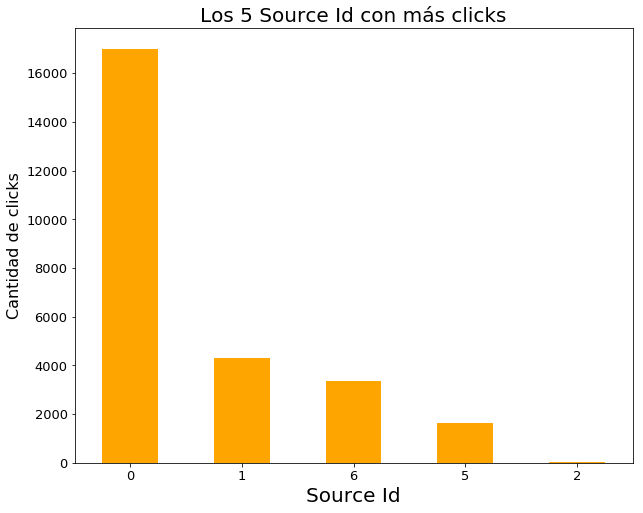

In [35]:
dfClicks.groupby('source_id')['total'].count().nlargest(5).plot(kind='bar', rot=0, figsize=(10,8) ,fontsize=13, color="Orange" );
plt.title('Los 5 Source Id con más clicks', fontsize=20);
plt.ylabel('Cantidad de clicks', fontsize=16);
plt.xlabel('Source Id', fontsize=20);

# Heatmap del set de datos

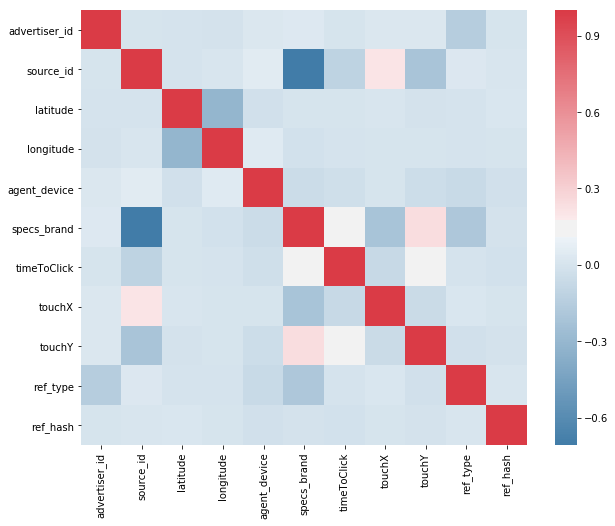

In [24]:
f, ax = plt.subplots(figsize=(10, 8)) 
corr = dfClicks.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240, 10, as_cmap=True), 
      square=False, ax=ax) 

Aqui observamos que attributed no tiene correlacion con los demas datos.

# Heatmap de hora vs dia de la semana

In [40]:
dfClicks["date"] = pd.to_datetime(dfClicks["created"],format='%Y-%m-%d %H:%M:%S', utc=True)


In [41]:
dfClicks["month"] = dfClicks["date"].dt.month
dfClicks["day"] = dfClicks["date"].dt.day
dfClicks["hour"] = dfClicks["date"].dt.hour
dfClicks["minute"] = dfClicks["date"].dt.minute
dfClicks["second"] = dfClicks["date"].dt.second
dfClicks["date_single"] =dfClicks["date"].dt.date
dfClicks["weekday"] = dfClicks["date"].dt.weekday
dfClicks["weekday_name"] = dfClicks["date"].dt.weekday_name
dfClicks['dayofyear'] = pd.to_datetime(dfClicks["date"]).dt.dayofyear

In [17]:
dfClicks_gropuby2 = dfClicks.groupby(['weekday_name','hour'])['total'].count().to_frame()

In [18]:
dfClicks_gropuby2

total
weekday_name hour       
Friday       0       166
             1       988
             2        57
             3        13
             4        84
             5       154
             6       143
             7       147
             8       162
             9       252
             10      384
             11      264
             12       16
             13        4
             14        2
             15        1
             18        1
             19        1
Monday       1       878
             2       456
             3       233
             4       256
             5       149
             6        87
             7        57
             8        72
             9       102
             10      168
             11      230
             12      254
...                  ...
Tuesday      18      459
             19      175
             20      173
             21      200
             22      275
             23      249
Wednesday    0       256
             1       222
             2       238
             3       169
             4        81
             5        40
             6        26
             7         4
             8        12
             9        29
             10       55
             11       75
             12       85
             13      119
             14      129
             15      149
             16      155
             17      179
             18      191
             19      198
             20      215
             21      250
             22      302
             23      303

[132 rows x 1 columns]

In [19]:
dfPivot2 = dfClicks_gropuby2.reset_index().pivot(index='hour', columns='weekday_name', values='total')
dfPivot2 = dfPivot2.fillna(0)
dfPivot2 = dfPivot2[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
dfPivot2

weekday_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
0,0.0,0.0,256.0,0.0,166.0,16.0,2.0
1,878.0,411.0,222.0,0.0,988.0,1154.0,556.0
2,456.0,661.0,238.0,0.0,57.0,28.0,887.0
3,233.0,258.0,169.0,1.0,13.0,71.0,9.0
4,256.0,130.0,81.0,0.0,84.0,284.0,244.0
5,149.0,66.0,40.0,0.0,154.0,236.0,300.0
6,87.0,42.0,26.0,0.0,143.0,173.0,207.0
7,57.0,31.0,4.0,0.0,147.0,128.0,151.0
8,72.0,37.0,12.0,1.0,162.0,138.0,115.0


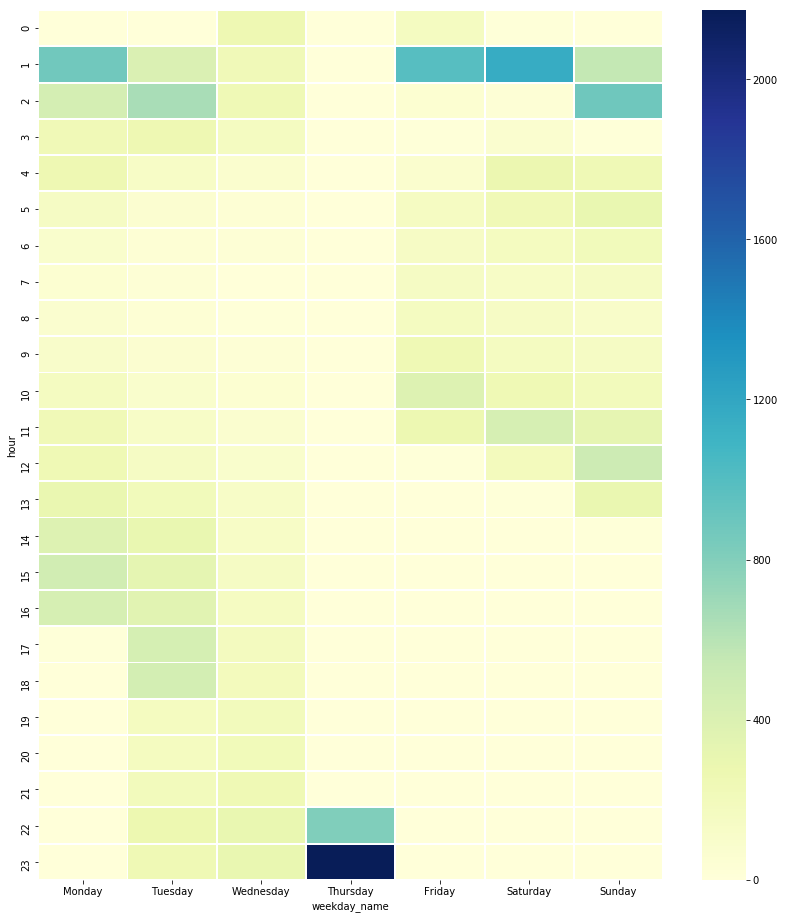

In [20]:
fig, ax = plt.subplots(figsize=(14,16))         # Sample figsize in inches
sns.heatmap(dfPivot2, annot=False, linewidths=.9010, ax=ax, cmap="YlGnBu"); #linewidths=.00010,

In [44]:
dfClicks["date_monthday"] = dfClicks["date"].apply(lambda x: x.strftime('%d/%m'))

In [47]:
dfClicks_byDate = dfClicks.groupby(['dayofyear','date_monthday'])['total'].count().to_frame()
dfClicks_byDate = dfClicks_byDate.reset_index().set_index('date_monthday')
dfClicks_byDate

,dayofyear,total
date_monthday,,
05/03,64,31
06/03,65,14
07/03,66,2989
08/03,67,2839
09/03,68,3283
10/03,69,3966
11/03,70,4557
12/03,71,5204
13/03,72,3468


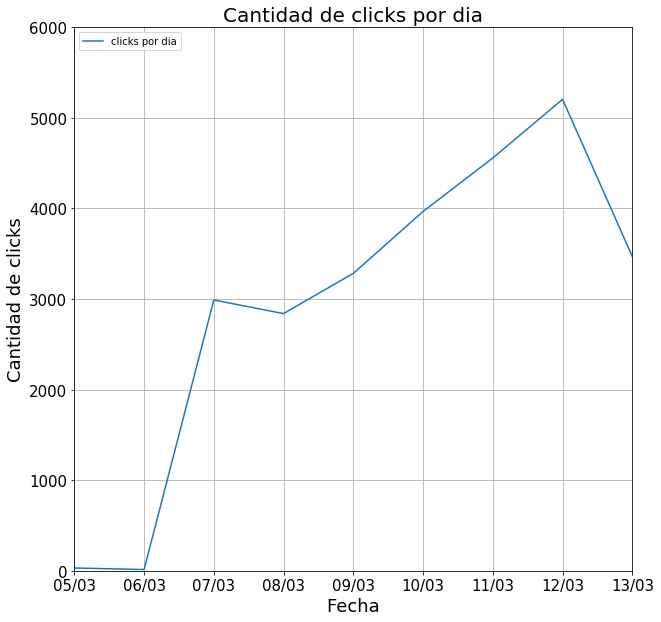

In [50]:
dfClicks_byDate.loc[:,'total'].plot(rot=0,figsize=(10,10),fontsize=15,x_compat=True,grid=True, ylim=(0, 6000))
plt.title('Cantidad de clicks por dia',fontsize=20);
plt.ylabel('Cantidad de clicks',fontsize=18);
plt.xlabel('Fecha',fontsize=18);
plt.legend(['clicks por dia'], loc='upper left');
plt.show()